##<b>_Import_

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

##<b>_Linear Regression_

<b>_Cost Function_</b> for linear regression

In [17]:
def costFunction(X, y, theta, lambda_):
  m = len(y)
  prediction = np.matmul(X, theta)
  error = prediction - y
  reg_term = (lambda_ / 2 * m) * np.sum((np.square(theta)))
  J = 1 / (2 * m) * np.matmul(error, error) + reg_term
  return J

<b>_Gradient Descent_


In [18]:
def gradientDescent(X, y, theta, alpha, iterations, lambda_):
  m = len(y)
  J_history = []
  #theta_history = np.zeros((iterations, 2))
  for i in range (iterations):
    h = np.matmul(X, theta) - y
    theta = theta - alpha / m * np.matmul(X.transpose(), h)
    #theta_history[i, :] = theta.T
    J_history.append(costFunction(X, y, theta, lambda_))
  #return theta, J_history, theta_history
  return theta, J_history

<b>_Open .csv and data refactoring_</b>
- GP = 1, MS = 0;
- F = 1, M = 0
- U = 1, R = 0;
- LE3 = 1, GT3 = 0;
- T = 1, A = 0;
- yes = 1, no = 0;
- job ->"other" = 0, "at_home" = 1,  "teacher" = 2, "health" = 3 care related, civil "services" = 4;
- reason -> "other" = 0, close to "home" = 1, school "reputation" = 2, "course" preference = 3;
- guardian -> "other" = 0, "father" = 1, "mother" = 2;

In [ ]:
df = pd.read_csv('student-mat.csv', delimiter=';');

df.school[df.school == 'GP'] = 1
df.school[df.school == 'MS'] = 0

df.sex[df.sex == 'F'] = 1
df.sex[df.sex == 'M'] = 0

df.address[df.address == 'U'] = 1
df.address[df.address == 'R'] = 0

df.famsize[df.famsize == 'LE3'] = 1
df.famsize[df.famsize == 'GT3'] = 0

df.Pstatus[df.Pstatus == 'T'] = 1
df.Pstatus[df.Pstatus == 'A'] = 0

df.Mjob[df.Mjob == 'other'] = 0
df.Mjob[df.Mjob == 'at_home'] = 1
df.Mjob[df.Mjob == 'teacher'] = 2
df.Mjob[df.Mjob == 'health'] = 3
df.Mjob[df.Mjob == 'services'] = 4

df.Fjob[df.Fjob == 'other'] = 0
df.Fjob[df.Fjob == 'at_home'] = 1
df.Fjob[df.Fjob == 'teacher'] = 2
df.Fjob[df.Fjob == 'health'] = 3
df.Fjob[df.Fjob == 'services'] = 4

df.reason[df.reason == 'other'] = 0
df.reason[df.reason == 'home'] = 1
df.reason[df.reason == 'reputation'] = 2
df.reason[df.reason == 'course'] = 3

df.guardian[df.guardian == 'other'] = 0
df.guardian[df.guardian == 'father'] = 1
df.guardian[df.guardian == 'mother'] = 2

df.schoolsup[df.schoolsup == 'yes'] = 1
df.schoolsup[df.schoolsup == 'no'] = 0

df.famsup[df.famsup == 'yes'] = 1
df.famsup[df.famsup == 'no'] = 0

df.paid[df.paid == 'yes'] = 1
df.paid[df.paid == 'no'] = 0

df.activities[df.activities == 'yes'] = 1
df.activities[df.activities == 'no'] = 0

df.nursery[df.nursery == 'yes'] = 1
df.nursery[df.nursery == 'no'] = 0

df.higher[df.higher == 'yes'] = 1
df.higher[df.higher == 'no'] = 0

df.internet[df.internet == 'yes'] = 1
df.internet[df.internet == 'no'] = 0

df.romantic[df.romantic == 'yes'] = 1
df.romantic[df.romantic == 'no'] = 0

#print(df.to_string())

<b>_Regressione Lineare_

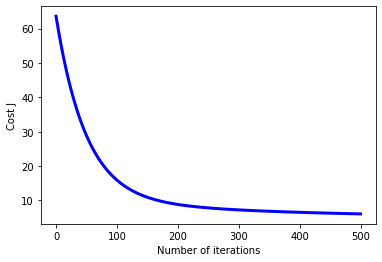

In [19]:
y = df['G3']
X = df.drop(['G3'], axis = 1)

x1New = X.iloc[:, 5] + X.iloc[:, 6]
x2New = X.iloc[:, 7] + X.iloc[:, 8]

X['x1New'] = x1New
X['x2New'] = x2New

X = df.to_numpy()
y = y.to_numpy().transpose()

m = X.shape[0]
n = X.shape[1]

mu = X.mean(0) 
sigma = X.max(0) - X.min(0)
diff = np.subtract(X, mu)
X_norm = diff / sigma

X_0 = np.hstack((np.ones((m, 1)), X_norm))

alpha = 0.01
iterations = 500
#theta_init = np.zeros((n, 1))
theta_init = np.zeros((n+1))
theta, J_history = gradientDescent(X_0, y, theta_init, alpha, iterations, 0.0001)

# Plot the convergence graph
plt.plot(np.arange(iterations), J_history, 'b', LineWidth=3)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [ ]:
X.head()

<hr>